In [182]:
import numpy as np
import pandas as pd
import seaborn as sns


In [183]:
w = pd.read_csv('waterQuality.csv')
w.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [184]:
w.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [185]:
w.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


array([[<AxesSubplot:title={'center':'ph'}>,
        <AxesSubplot:title={'center':'Hardness'}>,
        <AxesSubplot:title={'center':'Solids'}>],
       [<AxesSubplot:title={'center':'Chloramines'}>,
        <AxesSubplot:title={'center':'Sulfate'}>,
        <AxesSubplot:title={'center':'Conductivity'}>],
       [<AxesSubplot:title={'center':'Organic_carbon'}>,
        <AxesSubplot:title={'center':'Trihalomethanes'}>,
        <AxesSubplot:title={'center':'Turbidity'}>],
       [<AxesSubplot:title={'center':'Potability'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

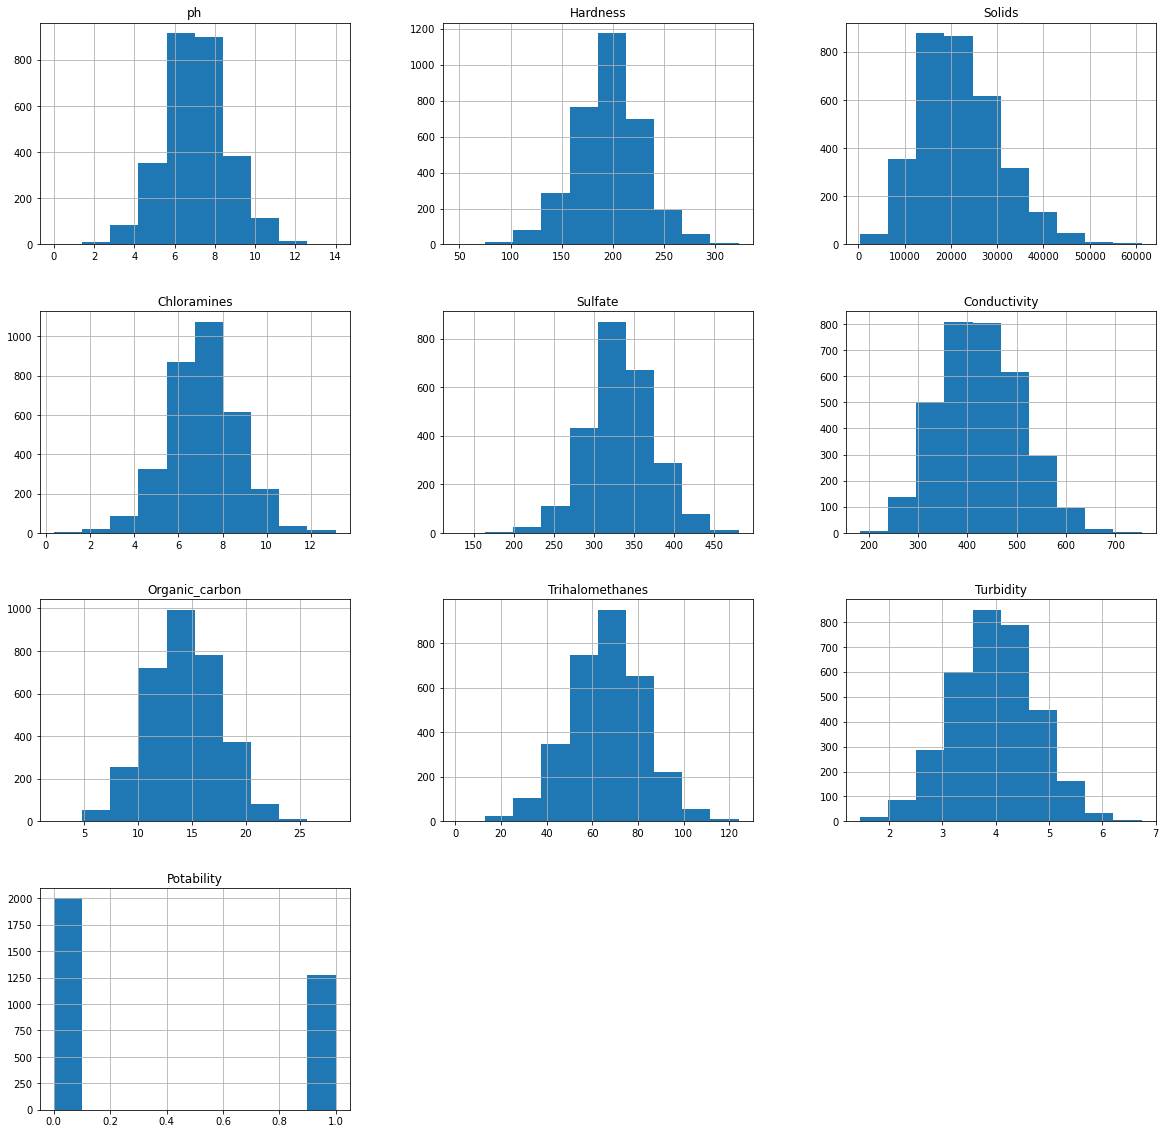

In [186]:
w.hist(figsize = (20,20))

<AxesSubplot:>

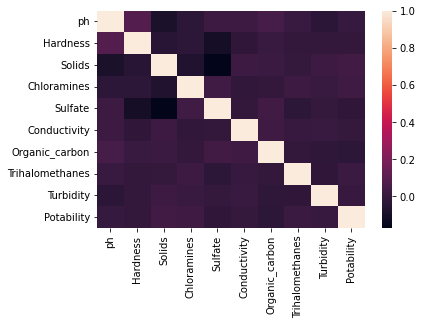

In [187]:
heatMap = sns.heatmap(w.corr())
heatMap

In [188]:
#pairPlot = sns.pairplot(w)
#pairPlot

In [189]:
avgpH = w['ph'].mean()
avgSulf = w['Sulfate'].mean()
avgTri = w['Trihalomethanes'].mean()

w['ph'].fillna(value = avgpH, inplace = True)
w['Sulfate'].fillna(value = avgSulf, inplace = True)
w['Trihalomethanes'].fillna(value = avgTri, inplace = True)

In [190]:
from scipy import stats
w = w[(np.abs(stats.zscore(w)<3).all(axis=1))]
w


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, log_loss

scoring = { 'precision' : make_scorer(precision_score),
            'recall' : make_scorer(recall_score), 
            'f1_score' : make_scorer(f1_score),
            'log_loss' : make_scorer(log_loss)
        }


x_train = x.drop('Potability', axis = 1)
y_true = w.loc[:, 'Potability']
y_train = y_true

logReg = LogisticRegression()
logReg.fit(x_train, y_train)

y_pred = logReg.predict(x_train)

modelScores = model_selection.cross_validate(logReg, x_train, y_pred, cv = 10, scoring = scoring)

modelScores

C:\Users\brian\anaconda3\envs\498A\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\brian\anaconda3\envs\498A\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\brian\anaconda3\envs\498A\lib\site-packages\sklearn\linear_model\_logistic.py", line 1554, in fit
    raise ValueError(
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  warnings.warn(some_fits_failed_messag

{'fit_time': array([0.0009973 , 0.00099707, 0.00099754, 0.00099754, 0.00099754,
        0.00199437, 0.00099754, 0.0009973 , 0.00199437, 0.00099754]),
 'score_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'test_precision': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
 'test_recall': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
 'test_f1_score': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
 'test_log_loss': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])}

In [192]:
import statistics

print("The average precision score is: ", statistics.mean(modelScores['test_precision']))
print("The average recall score is: ", statistics.mean(modelScores['test_recall']))
print("The average f1 score is: ", statistics.mean(modelScores['test_f1_score']))
print("The average log loss score is: ", statistics.mean(modelScores['test_log_loss']))

The average precision score is:  nan
The average recall score is:  nan
The average f1 score is:  nan
The average log loss score is:  nan


In [193]:
from sklearn import discriminant_analysis

disAnal = discriminant_analysis.LinearDiscriminantAnalysis()

disAnal.fit(x_train, y_train)
disAnal.predict(x_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [194]:
from sklearn import discriminant_analysis

disAnal = discriminant_analysis.LinearDiscriminantAnalysis()

disAnal.fit(x_train, y_train)
dis_pred = disAnal.predict(x_train)


modelScores2 = model_selection.cross_validate(logReg, x_train, dis_pred, cv = 10, scoring = scoring)

modelScores2

C:\Users\brian\anaconda3\envs\498A\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\brian\anaconda3\envs\498A\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\brian\anaconda3\envs\498A\lib\site-packages\sklearn\linear_model\_logistic.py", line 1554, in fit
    raise ValueError(
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  warnings.warn(some_fits_failed_messag

{'fit_time': array([0.00099707, 0.00199461, 0.00099802, 0.00099683, 0.00099802,
        0.00099659, 0.00099659, 0.00099874, 0.00099778, 0.00099754]),
 'score_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'test_precision': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
 'test_recall': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
 'test_f1_score': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
 'test_log_loss': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])}

In [195]:
print("The average precision score is: ", statistics.mean(modelScores2['test_precision']))
print("The average recall score is: ", statistics.mean(modelScores2['test_recall']))
print("The average f1 score is: ", statistics.mean(modelScores2['test_f1_score']))
print("The average log loss score is: ", statistics.mean(modelScores2['test_log_loss']))

The average precision score is:  nan
The average recall score is:  nan
The average f1 score is:  nan
The average log loss score is:  nan
